Computer Science and Engineering Group 3
GROUP MEMBERS
``````````````
1.ANUMBIA ANACHABA JULIUS  BS456101420
2.S
3.
4.
5.

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.callbacks import ModelCheckpoint



In [20]:
import matplotlib.pyplot as plt
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img

# Define the paths
yellow_spot_path = 'C:\\Users\\Anach\\Documents\\school project\\studies\\Digital Signal Processing\\GROUP WORK\\TEST1\\leafs\\test\\yellow_spot'
not_yellow_spot_path = 'C:\\Users\\Anach\\Documents\\school project\\studies\\Digital Signal Processing\\GROUP WORK\\TEST1\\leafs\\test\\not_yellow_spot'

# Get list of filenames for both classes
yellow_spot_filenames = os.listdir(yellow_spot_path)
not_yellow_spot_filenames = os.listdir(not_yellow_spot_path)



In [21]:
# Set the number of images to display
num_images_to_display = 5

# Randomly select images from each class
selected_yellow_spot = np.random.choice(yellow_spot_filenames, num_images_to_display)
selected_not_yellow_spot = np.random.choice(not_yellow_spot_filenames, num_images_to_display)

# Define the subplot grid and figure size
plt.figure(figsize=(10, num_images_to_display * 2))



<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

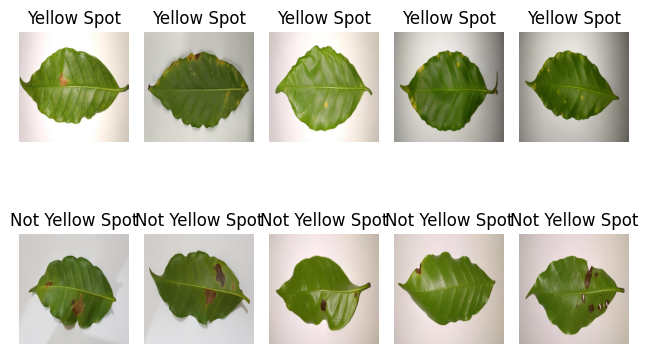

In [22]:
# Loop over selected images
for i in range(num_images_to_display):
    ax1 = plt.subplot(2, num_images_to_display, i+1)
    img1 = load_img(os.path.join(yellow_spot_path, selected_yellow_spot[i]))
    ax1.imshow(img1)
    ax1.set_title('Yellow Spot')
    ax1.axis('off')
    
    ax2 = plt.subplot(2, num_images_to_display, i+1+num_images_to_display)
    img2 = load_img(os.path.join(not_yellow_spot_path, selected_not_yellow_spot[i]))
    ax2.imshow(img2)
    ax2.set_title('Not Yellow Spot')
    ax2.axis('off')

# Show the plot
plt.tight_layout()
plt.show()

In [10]:
# Define image size and batch size
img_width, img_height = 150, 150
batch_size = 32


In [11]:

# Prepare data for training and validation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_generator = datagen.flow_from_directory(
    directory='C:\\Users\\Anach\\Documents\\school project\\studies\\Digital Signal Processing\\GROUP WORK\\TEST1\\leafs\\train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='training')

validation_generator = datagen.flow_from_directory(
    directory='C:\\Users\\Anach\\Documents\\school project\\studies\\Digital Signal Processing\\GROUP WORK\\TEST1\\leafs\\train',
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation')


Found 256 images belonging to 2 classes.
Found 63 images belonging to 2 classes.


In [12]:

# Build the model using an Input layer
model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])



In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

img_width, img_height = 150, 150  # Replace with the size of your images

model = Sequential([
    Input(shape=(img_width, img_height, 3)),
    Conv2D(32, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Use 'softmax' and change units if you have more than two classes
])



In [62]:
# Compile the model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



In [63]:
# Define model checkpoint
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')



In [64]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=150,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    callbacks=[checkpoint])


Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6275 - loss: 0.8188
Epoch 1: val_accuracy improved from -inf to 0.88889, saving model to best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 2s/step - accuracy: 0.6290 - loss: 0.8206 - val_accuracy: 0.8889 - val_loss: 0.6661
Epoch 2/150


C:\Python312\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)



Epoch 2: val_accuracy did not improve from 0.88889
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8889 - val_loss: 0.6361
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8055 - loss: 0.6293
Epoch 3: val_accuracy improved from 0.88889 to 1.00000, saving model to best_model.keras
8/8 ━━━━━━━━━━━━━━━━━━━━ 14s 2s/step - accuracy: 0.8058 - loss: 0.6217 - val_accuracy: 1.0000 - val_loss: 0.4743
Epoch 4/150

Epoch 4: val_accuracy did not improve from 1.00000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.4932
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.8690 - loss: 0.3240
Epoch 5: val_accuracy did not improve from 1.00000
8/8 ━━━━━━━━━━━━━━━━━━━━ 12s 1s/step - accuracy: 0.8670 - loss: 0.3335 - val_accuracy: 0.8889 - val_loss: 0.5835
Epoch 6/150

Epoch 6: val_accuracy did not improve from 1.00000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - accura

In [67]:
model.save('best_model.h5')



In [68]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np


In [69]:

# Load the saved model
model = load_model('best_model.h5')


In [70]:

# Define the validation data generator
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    'C:\\Users\\Anach\\Documents\\school project\\studies\\Digital Signal Processing\\GROUP WORK\\TEST1\\leafs\\test',
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary',
    shuffle=False)  # Important to keep order for comparison


Found 319 images belonging to 2 classes.


In [71]:

# Perform prediction on the entire validation dataset
num_of_test_samples = validation_generator.samples
predictions = model.predict(validation_generator, steps=num_of_test_samples)
predicted_classes = np.where(predictions > 0.5, 1, 0)
true_classes = validation_generator.classes


C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step


In [73]:

# Metrics calculation
accuracy = accuracy_score(true_classes, predicted_classes)
precision = precision_score(true_classes, predicted_classes)
recall = recall_score(true_classes, predicted_classes)
f1 = f1_score(true_classes, predicted_classes)

# Output the metrics
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.8777
Precision: 0.6832
Recall: 0.9079
F1 Score: 0.7797


Found 319 images belonging to 2 classes.


C:\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


319/319 ━━━━━━━━━━━━━━━━━━━━ 10s 29ms/step


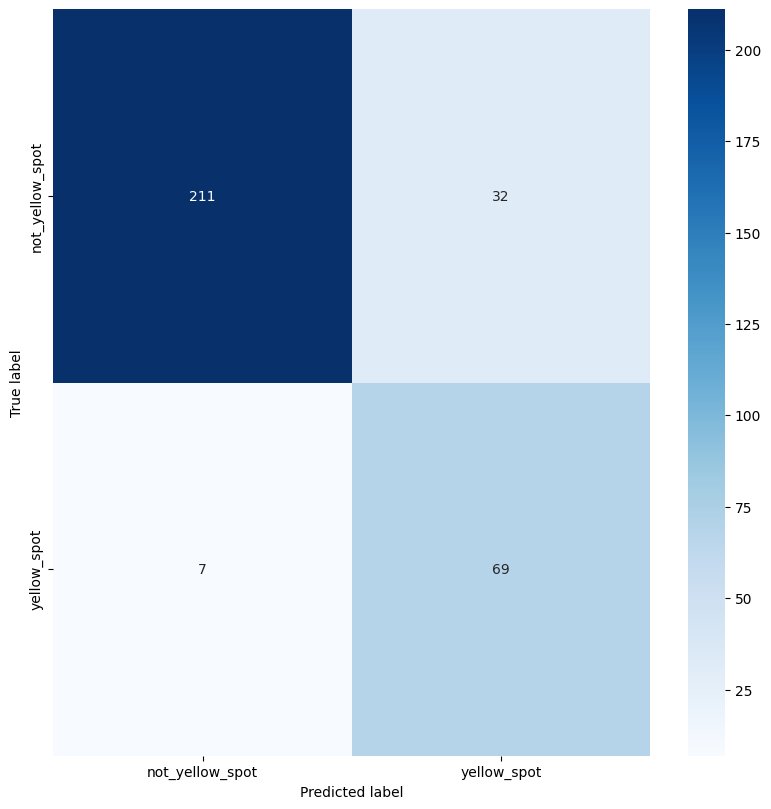

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load the saved model

model = load_model('best_model.h5')


# Data generator for validation data - ensure it matches how the model was trained

validation_datagen = ImageDataGenerator(rescale=1./255)

validation_generator = validation_datagen.flow_from_directory(

    'C:\\Users\\Anach\\Documents\\school project\\studies\\Digital Signal Processing\\GROUP WORK\\TEST1\\leafs\\test',
    target_size=(150, 150),
    batch_size=1,
    class_mode='binary',
    shuffle=False)  # No shuffling for confusion matrix

# Get the true labels
true_labels = validation_generator.classes

# Predictions - note that if you have more than 1 image to predict, loop through every image to predict
predictions = model.predict(validation_generator)
predicted_labels = np.where(predictions > 0.5, 1, 0)


# Generate the confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)


# Plotting the confusion matrix using seaborn
figure = plt.figure(figsize=(8, 8))
sns.heatmap(conf_matrix, annot=True, cmap=plt.cm.Blues, fmt="d",
            xticklabels=validation_generator.class_indices,
            yticklabels=validation_generator.class_indices)

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

<Axes: >

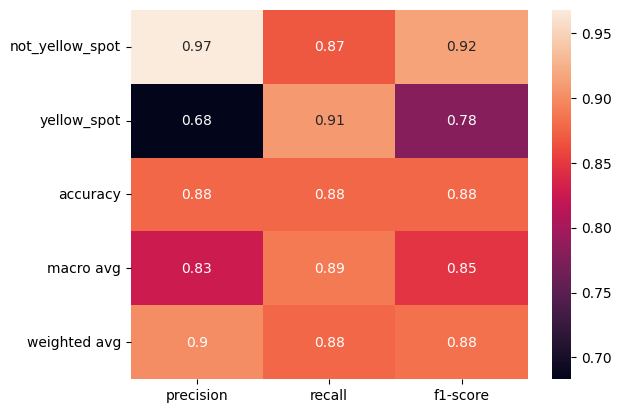

In [75]:
# Clasification REport useful for displaying the precision, recall, and F1-score for each class.
from sklearn.metrics import classification_report
import pandas as pd

report = classification_report(true_labels, predicted_labels, target_names=validation_generator.class_indices.keys(), output_dict=True)
sns.heatmap(pd.DataFrame(report).iloc[:-1, :].T, annot=True)

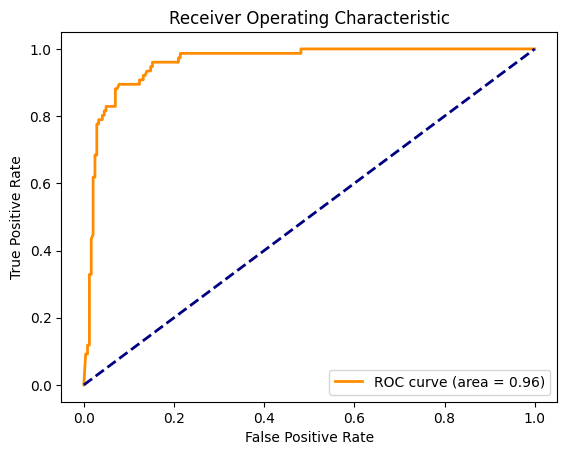

In [76]:
# ROC Curve: the Receiver Operating Characteristic (ROC) curve is a useful tool to visualize the performance of the classifier.
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(true_labels, predictions)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

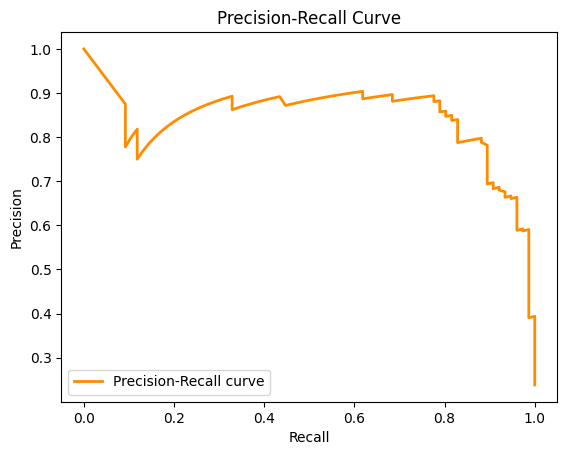

In [77]:
# Precision-Recall Curve: Another one for binary classification, which is especially useful when dealing with imbalanced datasets.
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(true_labels, predictions)

plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [78]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np

# Load the trained model that you saved earlier
model = load_model('best_model.h5')

# Replace the path with the path to your new image
image_path = 'C:\\Users\\Anach\\Documents\\school project\\studies\\Digital Signal Processing\\GROUP WORK\\TEST1\\DEMO_IMAGES\\6.jpg'

# Load and preprocess the image
img = load_img(image_path, target_size=(150, 150))  # Target size should match model's expected input
img_array = img_to_array(img)                       # Converts image to a numpy array
img_array = np.expand_dims(img_array, axis=0)       # Adds a batch dimension
img_array /= 255.0                                  # Rescale image values to [0, 1]

# Make the prediction
prediction = model.predict(img_array)

# Process the prediction
if prediction[0] > 0.5:
    print(f"The image is predicted as 'not_yellow_spot' with a probability of {prediction[0][0]}")
else:
    print(f"The image is predicted as 'yellow_spot' with a probability of {1 - prediction[0][0]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
The image is predicted as 'yellow_spot' with a probability of 0.5655207931995392


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 880ms/step


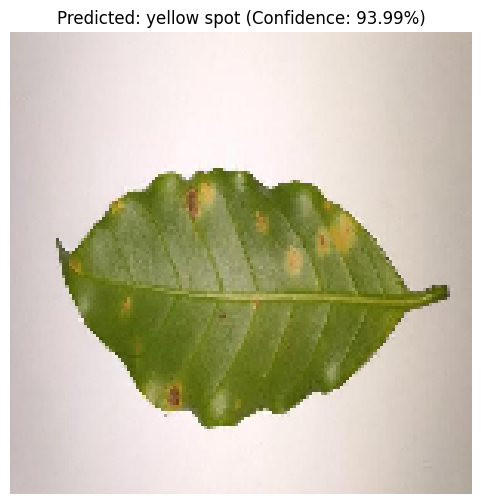

In [9]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model that you saved earlier
model = load_model('best_model.h5')

# Replace the path with the path to your new image
image_path = 'C:\\Users\\Anach\\Documents\\school project\\studies\\Digital Signal Processing\\GROUP WORK\\TEST1\\DEMO_IMAGES\\3.jpg'

# Load and preprocess the image
img = load_img(image_path, target_size=(150, 150))  # Resize the image for the model
img_array = img_to_array(img)                       # Convert the image to an array
img_array = np.expand_dims(img_array, axis=0)       # Add a batch dimension
img_array /= 255.0                                  # Rescale the image values

# Make the prediction
prediction = model.predict(img_array)

# Retrieve the confidence of the prediction
confidence = prediction[0][0]

# Create labels for the plot based on the prediction
if confidence > 0.5:
    predicted_class = 'yellow spot'
    confidence_percent = confidence * 100
else:
    predicted_class = 'not yellow spot'
    confidence_percent = (1 - confidence) * 100

# Visualization using matplotlib
plt.figure(figsize=(6, 6))
plt.imshow(img)
plt.axis('off')  # Turn off axes for better visuals
plt.title(f'Predicted: {predicted_class} (Confidence: {confidence_percent:.2f}%)')
plt.show()